<a href="https://colab.research.google.com/github/Clever-Lazinezz/Portfolio/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Purpose, Methodology & Analysis

#### Purpose

#### Methodology

Our prepocessing module uses three common techniques used in natuarl language processing (NLP): removing stop words, tokenizing, and stemming

Preparing text data is foreign to me, so please forgive any oversights. A common technique for removing noise from our input data is removing 'stop words.' Stop words, such as common articles, prepositions, conjunctions, some adverbs, and pronouns, are frequently removed during the preprocessing phase of neural network projects in natural language processing (NLP). This practice offers several advantages, including enhanced computational efficiency and reduced memory usage, particularly for large datasets and limited computational resources. By eliminating stop words, the model can focus more on content words that carry significant meaning, improving its ability to capture essential features of the text. Removing stop words can improve generalization, reduce noise, and improve overall performance.

Tokenization is the process of breaking text into smaller units such as words or subwords. Its primary purposes are to make text data comprehensible to a machine, extract features, enable statistical text analysis, and contributing to text cleaning through the removal of punctuation and standardization.

#### Analysis

##### Random Forest

##### NN Conformal Prediction

##### Neural Network

### References

* https://neptune.ai/blog/tokenization-in-nlp
* https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
* https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
* https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html#:~:text=Lemmatization%20usually%20refers%20to%20doing,is%20known%20as%20the%20lemma%20.

### Import Base Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

### Import Data

https://www.kaggle.com/datasets/kazanova/sentiment140/data

`Attribute Info:`

target: the polarity of the tweet (0 = negative or 4 = positive)

ids: The id of the tweet (2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding = 'ISO-8859-1',
                 names=["label", "id", "date", "query", "username", "text"],
                 # float_precision=... ,
                 engine='c',
                 sep=','
                 )

### Exploratory Data Analysis

In [ ]:
# Back-up to quickly retrieve original dataframe
backup_df = df.copy()

In [ ]:
df.head()

,label,id,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# Dropping columns I know I won't use
df.drop(columns=['id', 'query', 'username'], inplace=True)

In [ ]:
# Checking distibution of label data
# Our labels are evenly distributed
df['label'].value_counts()

0    800000
4    800000
Name: label, dtype: int64

In [ ]:
# Confirming we have two targets - 0(negative) 4(positive)
df.iloc[:,0].unique()

array([0, 4])

In [ ]:
# Subbing all positive instances (4) with 1
df['label'] = df['label'].where(df['label'] != 4, 1)
df.iloc[:,0].unique()

array([0, 1])

In [ ]:
df

,label,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# Extracting a subset of the data: colab has a ram limit and keeps crashing when trying to fit a model using all the data
from sklearn.model_selection import train_test_split

X = df
y = np.arange(len(df))
# new_df will be used for our training and local testing
# extra_df or a subset of extra_df will be used to evaluate the best model
extra_df, new_df, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
new_df

,label,date,text
541200,0,Tue Jun 16 18:18:12 PDT 2009,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,upper airways problem
...,...,...,...
839535,1,Sun Apr 19 11:10:34 PDT 2009,@crowsond You will have to very careful what y...
1023175,1,Fri May 22 07:45:59 PDT 2009,Busy weekend of photo shoots!!!!
1349377,1,Fri Jun 05 10:22:51 PDT 2009,"@InterweaveNews Thanks for the link, that -is-..."
1086942,1,Fri May 29 23:50:35 PDT 2009,Grounded for the weekend. But really... I dont...


In [ ]:
# Roughly 50/50 split between label counts
new_df['label'].value_counts()

1    160506
0    159494
Name: label, dtype: int64

In [ ]:
df = new_df

#### Word Processing Tweets

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
# print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Getting list of english stop words
stopwords_list = stopwords.words('english')
print(len(stopwords_list))

179


In [ ]:
# Make all text lower case
df['text'] = df['text'].str.lower()

In [ ]:
stopwords_string = ",".join(stopwords_list)

In [ ]:
# I may try a model with conjuctions as part of the input data
print(re.search('but', stopwords_string))
print(re.search('and', stopwords_string))
print(re.search('or', stopwords_string))

<re.Match object; span=(332, 335), match='but'>
<re.Match object; span=(328, 331), match='and'>
<re.Match object; span=(339, 341), match='or'>


In [ ]:
# Converting list to set for faster element search times
stopwords_set = set(stopwords_list)

In [ ]:
len(stopwords_set)

179

In [ ]:
"""
Definition: This function takes a text (str) and removes any 'stopwords' from it
Input: text(str) - A string input
Output: modified_text(str) - A modified string
"""
def remove_stopwords(text: str) -> str:
    split_text = text.split()
    processed_text = " ".join([word for word in split_text if word not in stopwords_set])
    return processed_text

In [ ]:
df['text'] = df['text'].apply(lambda text : remove_stopwords(text))

In [ ]:
df.head()

,label,date,text
541200,0,Tue Jun 16 18:18:12 PDT 2009,@chrishasboobs ahhh hope ok!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,"@misstoriblack cool , tweet apps razr 2"
766711,0,Tue Jun 23 13:40:11 PDT 2009,@tiannachaos know family drama. lame.hey next ...
285055,0,Mon Jun 01 10:26:07 PDT 2009,school email open geography stuff revise! *stu...
705995,0,Sat Jun 20 12:56:51 PDT 2009,upper airways problem


In [ ]:
punctuation_list = list(string.punctuation)

In [ ]:
punctuation_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
# Proof of concept - testing
"""
print(punctuation_pattern = re.compile('[%s]' % re.escape(string.punctuation)))
text = "Some people said . I coudln't, do it,, ^ Idid* ist . # woooofjj~sl down+ below"
cleaned_text = punctuation_pattern.sub('', text)
print(cleaned_text)
"""

'\nprint(punctuation_pattern = re.compile(\'[%s]\' % re.escape(string.punctuation)))\ntext = "Some people said . I coudln\'t, do it,, ^ Idid* ist . # woooofjj~sl down+ below"\ncleaned_text = punctuation_pattern.sub(\'\', text)\nprint(cleaned_text)\n'

In [ ]:
"""
Description: This method removes all english punctuations from an input
Input: text(str) - A string
Output: cleaned_text(str) - A modified string
"""
def remove_punctuations(text):
    punctuation_pattern = re.compile('[%s]' % re.escape(string.punctuation))
    cleaned_text = punctuation_pattern.sub('', text)
    return cleaned_text

In [ ]:
df['text'] = df['text'].apply(lambda x : remove_punctuations(x))

In [ ]:
"""
Description: This method replaces all instances of consecutively repeating characters with a single instance of said character
Input: text(str) - A string
Output: (str) - A modified string
"""
def remove_repeating(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
df['text'] = df['text'].apply(lambda x : remove_repeating(x))

In [ ]:
"""
Defintion: This function removes all characters attached to an '@' symbol with at least one whitespace before the
'@' symbol defining the start of a target and at least one whitespace defining the end of a target
Input: text(str) - A string
Output: (str) - A modified string
"""
def remove_tags(text):
    return re.sub('@[^\s]+', ' ', text)

In [ ]:
df['text'] = df['text'].apply(lambda x : remove_tags(x))

In [ ]:
"""
Defintion: This function removes all urls within a string
Input: text(str) - A string
Output: (str) - A modified string
"""
def remove_urls(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)

In [ ]:
df['text'] = df['text'].apply(lambda x : remove_urls(x))

In [ ]:
"""
Defintion: This function removes all numbers within a string
Input: text(str) - A string
Output: (str) - A modified string
"""
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

In [ ]:
df['text'] = df['text'].apply(lambda x : remove_numbers(x))

In [ ]:
# Making each text entry a list of words
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)

In [ ]:
"""
Definition: Stem a list of words using the Porter stemming algorithm.
Input: word_list(list) - List of words to be stemmed.
Output: stemmed_words(list) - List of stemmed words.
"""
def stem_words(word_list):
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in word_list]
    return stemmed_words

In [ ]:
df['text'] = df['text'].apply(lambda x : stem_words(x))

In [ ]:
"""
Definition:
Input:
df(pd.DataFrame) - pandas Dataframe
column(index) - index of a column that contains lists of strings representing seperate words
Output:

"""
def unique_words(df, column):
    dah_words = set()
    for row in df[column]:
        for word in row:
            dah_words.add(word)
    return dah_words

In [ ]:
unique_words_set = unique_words(df, 'text')

In [ ]:
# Total unique words before stemming - 730195
# Total unique words after stemming - 668622
len(unique_words_set)

211707

In [ ]:
"""
Definition:
Input:
df(pd.DataFrame) - pandas Dataframe
column(index) - index of a column that contains lists of strings representing seperate words
Output:

"""
def unique_words(df, column):
    dah_words = dict()
    for row in df[column]:
        for word in row:
            if word in dah_words.keys():
                dah_words[word] += 1
                continue
            dah_words[word] = 1
    return dah_words

### Data Visualiztion

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sample data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Create a histogram
plt.hist(data, bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()


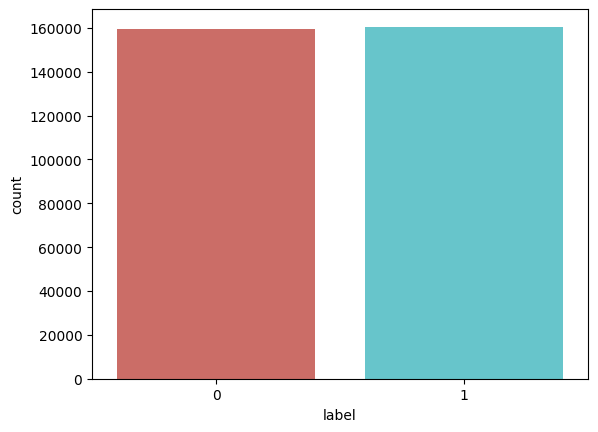

<Figure size 640x480 with 0 Axes>

In [ ]:
# Showing distribution of positive and negative tweets for the entire dataset
sns.countplot(x='label', data=df, palette='hls')
plt.show()
plt.savefig('count plot')

([<matplotlib.patches.Wedge at 0x7d9c9c3871c0>,
 [Text(0.9526279355804298, 0.5500000148652441, 'Our Dataset'),
  Text(-0.9526279613277877, -0.5499999702695112, 'Excess Data')])

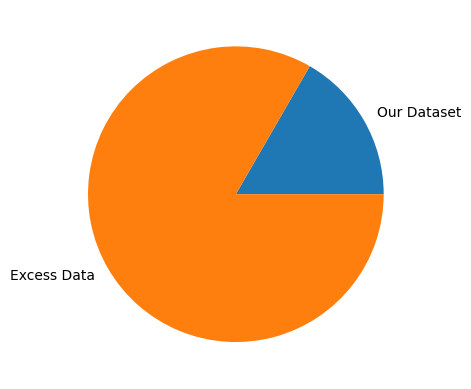

In [ ]:
# Showing the percentage of data we are using
plt.pie([320000, 1600000], labels=['Our Dataset', 'Excess Data'], colors=None, radius=1, frame=False, data=None)

In [ ]:
# Plotting the percentage of total words used after stemming
plt.pie([100293, 668622], labels=None, colors=None, radius=1, frame=False, data=None)

### Model Creation & Evaluation

#### Neural Netowrk

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
X = df.text
y = df.label

In [ ]:
max_len = 500 # Max length of integer sequences
# tok = Tokenizer(num_words=2000) - Professor said 2000 is low
# lets do 10%-20% of unique words - 15% = 100293 after stemming
tok = Tokenizer(num_words=100293) # Keeping only the 100293 most common words in our text dataset
tok.fit_on_texts(X) # Updating the tokenizer's internal vocabulary
sequences = tok.texts_to_sequences(X) # Converts text data to integer sequences
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len) # Ensures that each integer sequence has a length of 500 via truncating or padding sequences

In [ ]:
sequences_matrix.shape

(320000, 500)

In [ ]:
sequences_matrix

array([[    0,     0,     0, ...,   149,    37,   124],
       [    0,     0,     0, ...,   104,   601, 16227],
       [    0,     0,     0, ...,    49,   222,    19],
       ...,
       [    0,     0,     0, ...,   412,   405,  3610],
       [    0,     0,     0, ...,   110,    86,   157],
       [    0,     0,     0, ...,   181,   631,   412]], dtype=int32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [ ]:
# Activation Layer: relu, tanh, sigmoid
# Output Layer: binary
# possibly try character encoding
# lemmanizing will likely yield better results

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs', shape=[max_len])#step1
    layer = Embedding(100293, 50, input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256, name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1, name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=80, epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished!!!')

Epoch 1/6
2520/2520 [==============================] - 1109s 439ms/step - loss: 0.5165 - accuracy: 0.7427 - val_loss: 0.4817 - val_accuracy: 0.7660
Epoch 2/6
2520/2520 [==============================] - 1108s 440ms/step - loss: 0.4698 - accuracy: 0.7783 - val_loss: 0.4763 - val_accuracy: 0.7671
Epoch 3/6
2520/2520 [==============================] - 1109s 440ms/step - loss: 0.4495 - accuracy: 0.7919 - val_loss: 0.4753 - val_accuracy: 0.7708
Epoch 4/6
2520/2520 [==============================] - 1109s 440ms/step - loss: 0.4247 - accuracy: 0.8083 - val_loss: 0.4741 - val_accuracy: 0.7721
Epoch 5/6
2520/2520 [==============================] - 1107s 439ms/step - loss: 0.3919 - accuracy: 0.8292 - val_loss: 0.5157 - val_accuracy: 0.7558
Epoch 6/6
2520/2520 [==============================] - 1079s 428ms/step - loss: 0.3640 - accuracy: 0.8449 - val_loss: 0.4953 - val_accuracy: 0.7625
Training finished!!!


In [ ]:
X_train_predictions = model.predict(X_train)

7000/7000 [==============================] - 509s 73ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
# Low error rate (0.21733836850928434) as expected since we're predicting on the data the model has already seen
mean_absolute_error(X_train_predictions, Y_train)

0.21733836850928434

In [ ]:
accuracy = model.evaluate(X_test, Y_test)
print(f'Test set\n  Accuracy: {accuracy[1]:0.2f}')

3000/3000 [==============================] - 213s 71ms/step - loss: 0.5004 - accuracy: 0.7702


In [ ]:
X_test_predictions = model.predict(X_test)

3000/3000 [==============================] - 196s 65ms/step


In [ ]:
# Low error rate (0.2823216973156025) - i'm satisfied with the results
# Unfortunately, I don't have the time to fine tune the model using a validation set as the model takes over an hour to train
mean_absolute_error(X_test_predictions, Y_test)

0.2823216973156025

In [ ]:
# Setting our prediction threshold because our model outputs probabilities
y_pred = (X_test_predictions > 0.5).astype(int)
print(y_pred)

##### Evaluation Visuals

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
# Calculate precision and recall
precision = precision_score(Y_test, X_test_predictions.round())
recall = recall_score(Y_test, X_test_predictions.round())

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_predictions.round())

In [ ]:
# Checking the output dimensions
conf_matrix

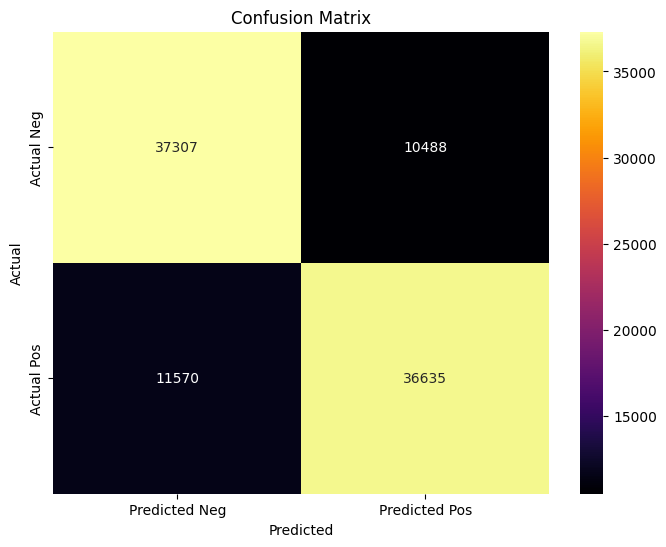

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['Predicted Neg', 'Predicted Pos'], yticklabels=['Actual Neg', 'Actual Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

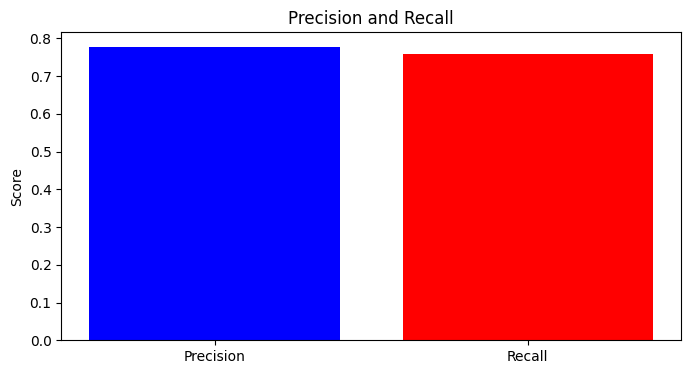

In [ ]:
# Plot precision and recall
plt.figure(figsize=(8, 4))
plt.bar(['Precision', 'Recall'], [precision, recall], color=['blue', 'red'])
plt.title('Precision and Recall')
plt.ylabel('Score')
plt.show()

#### Default Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df.text
y = df.label

In [ ]:
max_len = 500 # Max length of integer sequences
# lets do 10%-20% of unique words - 15% = 100293 after stemming
tok = Tokenizer(num_words=100293) # Keeping only the 2000 most common words in our text dataset
tok.fit_on_texts(X) # Updating the tokenizer's internal vocabulary
sequences = tok.texts_to_sequences(X) # Converts text data to integer sequences
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len) # Ensures that each integer sequence has a length of 500 via truncating or padding sequences

In [ ]:
sequences_matrix.shape

(320000, 500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [ ]:
# Creating a default random forest model
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_train_predictions = rfc.predict(X_train)

In [ ]:
np.unique(X_train_predictions, return_counts=True)

(array([0, 1], dtype=int64), array([120011, 103989]))

In [ ]:
# High accuracy (0.95) for predicting on the training data already seen by the model
print(classification_report(X_train_predictions, y_train))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    120011
           1       0.92      0.99      0.95    103989

    accuracy                           0.95    224000
   macro avg       0.95      0.96      0.95    224000
weighted avg       0.96      0.95      0.95    224000



In [ ]:
X_test_predictions = rfc.predict(X_test)

In [ ]:
# Unfavorable accuracy (0.59) for predicting on test data
print(classification_report(X_test_predictions, y_test))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62     54311
           1       0.53      0.61      0.56     41689

    accuracy                           0.59     96000
   macro avg       0.59      0.59      0.59     96000
weighted avg       0.60      0.59      0.59     96000



#### Optomized Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.text
y = df.label

In [ ]:
max_len = 500 # Max length of integer sequences
# lets do 10%-20% of unique words - 15% = 100293 after stemming
tok = Tokenizer(num_words=100293) # Keeping only the 2000 most common words in our text dataset
tok.fit_on_texts(X) # Updating the tokenizer's internal vocabulary
sequences = tok.texts_to_sequences(X) # Converts text data to integer sequences
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len) # Ensures that each integer sequence has a length of 500 via truncating or padding sequences

In [ ]:
sequences_matrix.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
# Tried this: ran for 2 hours 42 minutes and broke :(
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 10, 20, 50, None],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

In [ ]:
# 52 minutes for completion
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 50, None]
}

In [ ]:
# grid_search = GridSearchCV(rfc, parameters, cv=3, n_jobs=-1)
grid_search = GridSearchCV(rfc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, None],
                         'n_estimators': [10, 50, 100]})

In [ ]:
# Credits: https://www.kaggle.com/code/onadegibert/sentiment-analysis-with-tfidf-and-random-forest
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# BEST PARAMS: {'max_depth': 50, 'n_estimators': 100}
print_results(grid_search)

BEST PARAMS: {'max_depth': 50, 'n_estimators': 100}

0.553 (+/-0.007) for {'max_depth': 10, 'n_estimators': 10}
0.556 (+/-0.004) for {'max_depth': 10, 'n_estimators': 50}
0.556 (+/-0.005) for {'max_depth': 10, 'n_estimators': 100}
0.561 (+/-0.002) for {'max_depth': 20, 'n_estimators': 10}
0.57 (+/-0.005) for {'max_depth': 20, 'n_estimators': 50}
0.574 (+/-0.005) for {'max_depth': 20, 'n_estimators': 100}
0.561 (+/-0.002) for {'max_depth': 50, 'n_estimators': 10}
0.584 (+/-0.004) for {'max_depth': 50, 'n_estimators': 50}
0.591 (+/-0.006) for {'max_depth': 50, 'n_estimators': 100}
0.563 (+/-0.006) for {'max_depth': None, 'n_estimators': 10}
0.581 (+/-0.006) for {'max_depth': None, 'n_estimators': 50}
0.589 (+/-0.005) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Using the information gained from grid search, we construct our new classifier
rfc = RandomForestClassifier(max_depth=50, n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

In [ ]:
X_train_predictions = rfc.predict(X_train)

In [ ]:
# High accuracy (0.99) for predicting on the training data already seen by the model
# Could be a strong indicator of overfitting...
print(classification_report(X_train_predictions, y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    112116
           1       0.99      1.00      0.99    111884

    accuracy                           0.99    224000
   macro avg       0.99      0.99      0.99    224000
weighted avg       0.99      0.99      0.99    224000



In [ ]:
X_test_predictions = rfc.predict(X_test)

In [ ]:
# Unfavorable accuracy (0.60) for predicting on test data
print(classification_report(X_test_predictions, y_test))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     51233
           1       0.56      0.60      0.58     44767

    accuracy                           0.60     96000
   macro avg       0.60      0.60      0.59     96000
weighted avg       0.60      0.60      0.60     96000



#### Eval For Best Model - Neural Network

In [ ]:
extra_df

,label,date,text
1374558,1,Fri Jun 05 22:04:23 PDT 2009,"@jbtaylor WIth ya. &quot;I'd like a Palm Pre, ..."
1389115,1,Sat Jun 06 03:12:21 PDT 2009,"felt the earthquake this afternoon, it seems t..."
1137831,1,Sat May 30 19:02:49 PDT 2009,"Ruffles on shirts are like so in, me Likey"
790714,0,Thu Jun 25 05:59:18 PDT 2009,Pretty bad night into a crappy morning....FML!...
1117911,1,Sat May 30 11:16:35 PDT 2009,"@dcbriccetti yeah, what a clear view!"
...,...,...,...
259178,0,Sun May 31 16:57:39 PDT 2009,this song's middle change just doesn't want to...
1414414,1,Sat Jun 06 12:14:24 PDT 2009,@officialnjonas Good luck with that
131932,0,Mon May 18 06:26:21 PDT 2009,@ProudGamerTweet I rather average 32370
671155,0,Fri Jun 19 18:06:46 PDT 2009,Pickin up @misstinayao waitin on @sadittysash ...


In [ ]:
val_x = extra_df.text
val_y = extra_df.label

In [ ]:
val_x

1374558    @jbtaylor WIth ya. &quot;I'd like a Palm Pre, ...
1389115    felt the earthquake this afternoon, it seems t...
1137831          Ruffles on shirts are like so in, me Likey 
790714     Pretty bad night into a crappy morning....FML!...
1117911               @dcbriccetti yeah, what a clear view! 
                                 ...                        
259178     this song's middle change just doesn't want to...
1414414                 @officialnjonas Good luck with that 
131932              @ProudGamerTweet I rather average 32370 
671155     Pickin up @misstinayao waitin on @sadittysash ...
121958     @ home studying for maths wooot ! im so going ...
Name: text, Length: 1280000, dtype: object

In [ ]:
_, val_x_test, _, val_y_test = train_test_split(val_x, val_y, test_size=0.15, random_state=2)

In [ ]:
# Applying Same Preprocessing As Training Data
val_x_test = val_x_test.str.lower()
val_x_test = val_x_test.apply(lambda text: remove_stopwords(text))
val_x_test = val_x_test.apply(lambda x: remove_punctuations(x))
val_x_test = val_x_test.apply(lambda x: remove_repeating(x))
val_x_test = val_x_test.apply(lambda x: remove_tags(x))
val_x_test = val_x_test.apply(lambda x: remove_urls(x))
val_x_test = val_x_test.apply(lambda x: remove_numbers(x))
tokenizer = RegexpTokenizer(r'\w+')
val_x_test = val_x_test.apply(tokenizer.tokenize)
val_x_test = val_x_test.apply(lambda x: stem_words(x))


max_len = 500 # Max length of integer sequences
tok = Tokenizer(num_words=100293) # Keeping only the 100293 most common words in our text dataset
tok.fit_on_texts(val_x_test) # Updating the tokenizer's internal vocabulary
val_sequences = tok.texts_to_sequences(val_x_test) # Converts text data to integer sequences
val_sequences_matrix = sequence.pad_sequences(val_sequences, maxlen=max_len) # Ensures that each integer sequence has a length of 500 via truncating or padding sequences


In [ ]:
val_sequences_matrix.shape

(192000, 500)

In [ ]:
val_x_one, val_x_two, val_y_one, val_y_two = train_test_split(val_sequences_matrix, val_y_test, test_size=0.65, random_state=2)

In [ ]:
# First Validation - 54%
accuracy = model.evaluate(val_x_one, val_y_one)
print(f'Test set\n  Accuracy: {accuracy[1]:0.2f}')

2100/2100 [==============================] - 159s 76ms/step - loss: 0.9209 - accuracy: 0.5366
Test set
  Accuracy: 0.54


In [ ]:
# Second Validation - 54%
accuracy = model.evaluate(val_x_two, val_y_two)
print(f'Test set\n  Accuracy: {accuracy[1]:0.2f}')

3900/3900 [==============================] - 294s 75ms/step - loss: 0.9219 - accuracy: 0.5362
Test set
  Accuracy: 0.54


In [ ]:
print(4
    )

4
